In [1]:
import sys
sys.path.append('/home/xiaohl/FHNW/STIX/gsw/sdcpy')
from collections import OrderedDict
from functools import partial
from stixdcpy import instrument as ins
import astropy.units as u
from stixdcpy import transmission as tr
import numpy as np
from astropy.table.table import Table
from roentgen.absorption.material import Compound, MassAttenuationCoefficient, Material
from matplotlib import pyplot as plt
from ipywidgets import interact, interact_manual, widgets

%matplotlib notebook


In [2]:
t=tr.Transmission(material_version=1)

<IPython.core.display.Javascript object>


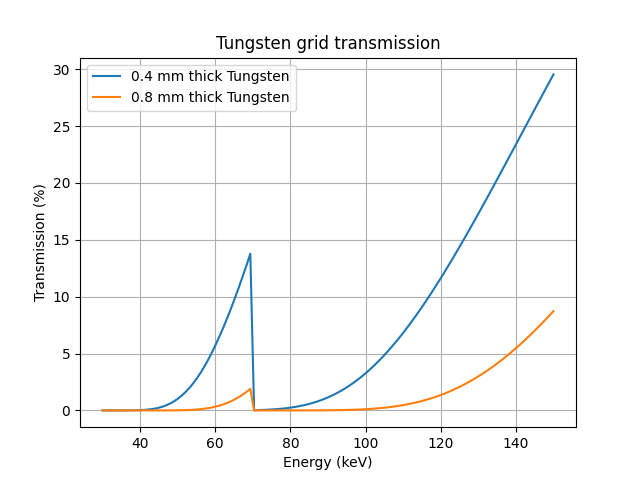

Compound(Compound(tungsten 0.4 mm 19280.0 kg / m3))
Compound(Compound(tungsten 0.8 mm 19280.0 kg / m3))


In [8]:
energies=np.linspace(30,150,120)
plt.figure()
factor1=t.get_transmission_of_component('single_grid', energies)
factor2=t.get_transmission_of_component('double_grid', energies)
plt.plot(energies, factor1*100, label='0.4 mm thick Tungsten')
plt.plot(energies, factor2*100, label='0.8 mm thick Tungsten')
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission (%)')
#plt.xscale('log')
plt.legend()
plt.title('Tungsten grid transmission')
#plt.yscale('log')
plt.grid('on')

<IPython.core.display.Javascript object>


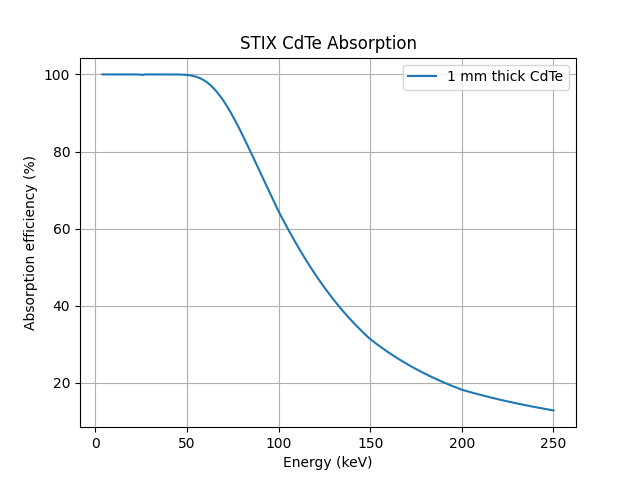

Compound(Compound(cdte 1.0 mm 6200.0 kg / m3))


In [15]:
ex=np.linspace(4,250,246)
plt.figure()
factor_cdte=t.get_transmission_of_component('caliste', ex)

plt.plot(ex, 100*(1-factor_cdte), '-', label='1 mm thick CdTe')

plt.xlabel('Energy (keV)')
plt.ylabel('Absorption efficiency (%)')
#plt.xscale('log')
plt.legend()
plt.title('STIX CdTe Absorption')
#plt.yscale('log')
plt.grid('on')

In [5]:
#factor1 == factor2**2

attenuator included


##Switch to old materials
attenuator included


<IPython.core.display.Javascript object>


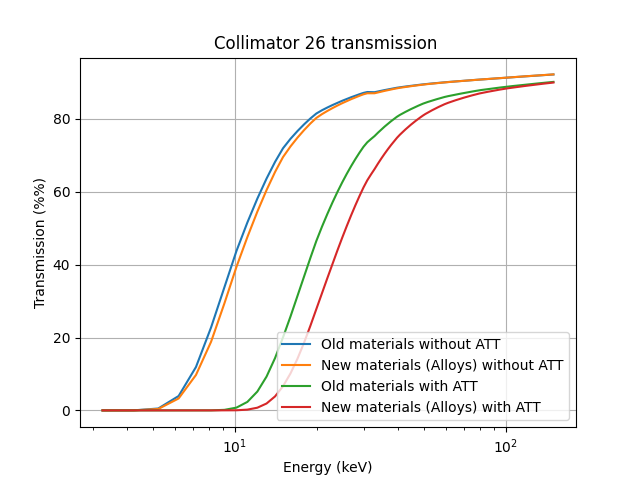

In [17]:
#attenuator=False
def get_trans(detector_id):
    energies=np.linspace(3,150,300)
    ebins=energies.reshape((-1,2))
    plt.close('all')
    stran=tr.Transmission(material_version=1)
    
    
    factors_new_wo_att=stran.get_detector_transmission(detector_id,
                                  ebins, attenuator=False)
    
  
    factors_new_att=stran.get_detector_transmission(detector_id,
                                  ebins, attenuator=True)
    print("\n\n##Switch to old materials")
    stran2=tr.Transmission(material_version=0)


    
    factors_old_wo_att=stran2.get_detector_transmission(detector_id,
                                  ebins, attenuator=False)
    factors_old_att=stran2.get_detector_transmission(detector_id,
                                  ebins, attenuator=True)

    plt.figure()
    ex=np.mean(ebins,axis=1)
    plt.plot(ex, factors_old_wo_att*100, label=f'Old materials without ATT')
    plt.plot(ex, factors_new_wo_att*100, label=f'New materials (Alloys) without ATT')

    plt.plot(ex, factors_old_att*100, label=f'Old materials with ATT')
    plt.plot(ex, factors_new_att*100, label=f'New materials (Alloys) with ATT')
    
    plt.xlabel('Energy (keV)')
    plt.ylabel('Transmission (%%)')
    plt.xscale('log')
    plt.legend()
    plt.title(f'Collimator {detector_id} transmission ')
    #plt.yscale('log')
    plt.grid('on')
    





#interact_manual(get_trans, detector_id=widgets.IntSlider(min=0,max=32,value=26,step=1)    )
get_trans(26)
        

<IPython.core.display.Javascript object>


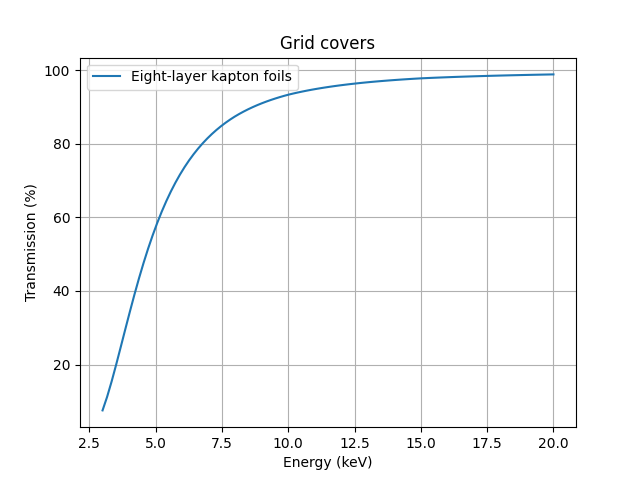

Compound(Compound(kapton 0.15239999999999998 mm 1430.0 kg / m3))


In [7]:
#transmission of grid cover
plt.figure()
energies=np.linspace(3,20,100)
factor=t.get_transmission_of_component('dem', energies)
plt.plot(energies, factor*100, label='Eight-layer kapton foils')
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission (%)')
#plt.xscale('log')
plt.legend()
plt.title('Grid covers')
#plt.yscale('log')
plt.grid('on')